# Analysis of Anscombe's Quarter Dataset
<div style="text-align: right"> Fundamentals of Data Analysis</div>
<div style="text-align: right"> Shane Healy, OCT-2018</div>


# Background

Who created?

When

How

# Plotting Dataset

In [102]:
import pandas as pd

In [103]:
# Read in csv file.
df_read = pd.read_csv("asc_data.csv")

In [104]:
# Pandas styling used to highlight null values in dataset
df_read.style.highlight_null(null_color='red')

,Observation,x1,y1,Unnamed: 3,x2,y2,Unnamed: 6,x3,y3,Unnamed: 9,x4,y4
0,1,10,8.04,nan,10,9.14,nan,10,7.46,nan,8,6.58
1,2,8,6.95,nan,8,8.14,nan,8,6.77,nan,8,5.76
2,3,13,7.58,nan,13,8.74,nan,13,12.74,nan,8,7.71
3,4,9,8.81,nan,9,8.77,nan,9,7.11,nan,8,8.84
4,5,11,8.33,nan,11,9.26,nan,11,7.81,nan,8,8.47
5,6,14,9.96,nan,14,8.1,nan,14,8.84,nan,8,7.04
6,7,6,7.24,nan,6,6.13,nan,6,6.08,nan,8,5.25
7,8,4,4.26,nan,4,3.1,nan,4,5.39,nan,19,12.5
8,9,12,10.84,nan,12,9.13,nan,12,8.15,nan,8,5.56
9,10,7,4.82,nan,7,7.26,nan,7,6.42,nan,8,7.91


Anscombe data set downloaded from Wabash College website, [1](http://www3.wabash.edu/econometrics/econometricsbook/Chapters/Ch05InterpretingRegression/ExcelFiles/Anscombe.xls), and saved as asc_data.csv. 

Pandas styling, [2](http://pandas.pydata.org/pandas-docs/stable/style.html), highlighted empty or null values. These null values will be dropped to clean to dataframe for future use. 

In [105]:
# Using Pandas to drop unwanted columns
df = df_read.drop(columns=['Unnamed: 3', 'Unnamed: 6', 'Unnamed: 9', 'Observation'])
df

,x1,y1,x2,y2,x3,y3,x4,y4
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47
5,14,9.96,14,8.10,14,8.84,8,7.04
6,6,7.24,6,6.13,6,6.08,8,5.25
7,4,4.26,4,3.10,4,5.39,19,12.50
8,12,10.84,12,9.13,12,8.15,8,5.56
9,7,4.82,7,7.26,7,6.42,8,7.91


To visualise the data, Pandas plotting is used. 

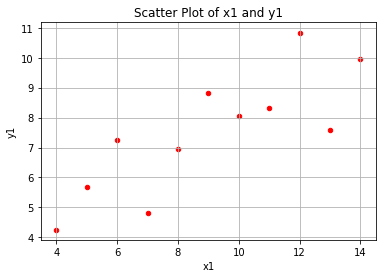

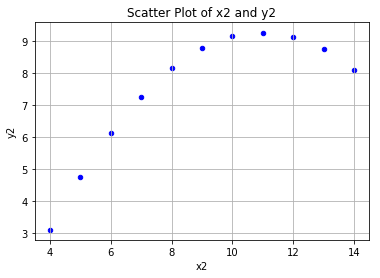

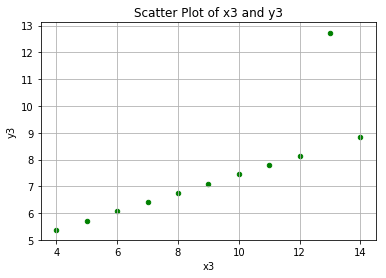

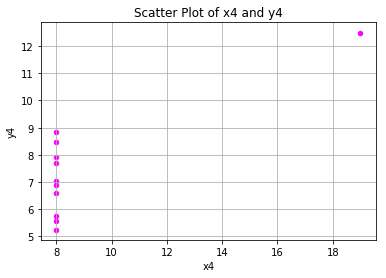

In [106]:
# Plots of x and y values as scatter plots.
df.plot(kind='scatter',x='x1',y='y1',color='red', title="Scatter Plot of x1 and y1",grid=True)
df.plot(kind='scatter',x='x2',y='y2',color='blue', title="Scatter Plot of x2 and y2",grid=True)
df.plot(kind='scatter',x='x3',y='y3',color='green', title="Scatter Plot of x3 and y3",grid=True)
df.plot(kind='scatter',x='x4',y='y4',color='magenta', title="Scatter Plot of x4 and y4",grid=True)


# Descriptive Statistics

In [42]:
# Dataframe describe used to provide descriptive statistics on data set. Pandas styling used for clarity of display.
df.describe().style.set_properties(**{'text-align': 'right'})

,x1,y1,x2,y2,x3,y3,x4,y4
count,11,11,11,11,11,11,11,11
mean,9,7.50091,9,7.50091,9,7.5,9,7.50091
std,3.31662,2.03157,3.31662,2.03166,3.31662,2.03042,3.31662,2.03058
min,4,4.26,4,3.1,4,5.39,8,5.25
25%,6.5,6.315,6.5,6.695,6.5,6.25,8,6.17
50%,9,7.58,9,8.14,9,7.11,8,7.04
75%,11.5,8.57,11.5,8.95,11.5,7.98,8,8.19
max,14,10.84,14,9.26,14,12.74,19,12.5


In [43]:
# Slicing descriptive statistics dataframe to compare different x data sets
stats = df.describe()
stats.iloc[1:3,[0,2,4,6]]


,x1,x2,x3,x4
mean,9.000000,9.000000,9.000000,9.000000
std,3.316625,3.316625,3.316625,3.316625


In [44]:
# Slicing descriptive statistics dataframe to compare different y data sets
stats.iloc[1:3,[1,3,5,7]] 

,y1,y2,y3,y4
mean,7.500909,7.500909,7.500000,7.500909
std,2.031568,2.031657,2.030424,2.030579


Values for mean and standard deviation, of x and y data sets, are equivalent. 

In [161]:
import numpy as np
import matplotlib.pyplot as plt

In [174]:
# Create arrays to hold data values from dataframe by referencing labels
x1 = df["x1"].values
y1 = df["y1"].values
x2 = df["x2"].values
y2 = df["y2"].values
x3 = df["x3"].values
y3 = df["y3"].values
x4 = df["x4"].values
y4 = df["y4"].values

In [89]:
# Write function for Linear Regression

def slr(x,y):
# Calculate the means of x and y.
    x_avg = np.mean(x)
    y_avg = np.mean(y)

    x_zero = x - x_avg
    y_zero = y - y_avg

# The best m, slope for line, is found by the following calculation.
    m = np.sum(x_zero * y_zero) / np.sum(x_zero * x_zero)

# Use m from above to calculate the best c, intercept.
    c = y_avg - m * x_avg

    return m,c


In [90]:
print("The m and c values for x1y1 are: ",slr(x1,y1))

The m and c values for x1y1 are:  (0.5000909090909091, 3.0000909090909103)


Therefore, the linear equation to describe the relationship between x1 and y1 is:

$ y1 = 0.5000909090909091*x1 + 3.0000909090909103$

The numpy.polyfit function will output the same details as slr function detailed above.

In [175]:
# First degree polynomial is linear
# Assigning array values to m, slope, and c, y intercept. 
m1,c1 = np.polyfit(x1,y1,1)
m2,c2 = np.polyfit(x2,y2,1)
m3,c3 = np.polyfit(x3,y3,1)
m4,c4 = np.polyfit(x4,y4,1)

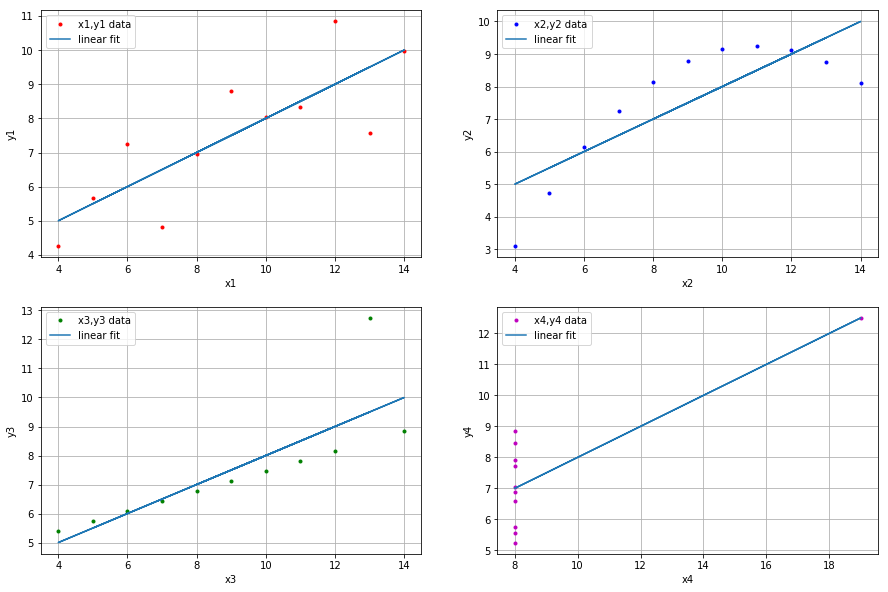

In [176]:
# Setting figure and defining size of subplots
fig = plt.figure(figsize=(15,10))

# Defining 4 subplots to display Anscombe data sets with linear fit.
plt.subplot(2, 2, 1)
plt.plot(x1,y1,'r.',label='x1,y1 data')
plt.plot(x1,m1*x1+c1,label='linear fit')
plt.xlabel('x1')
plt.ylabel('y1')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(x2,y2,'b.',label='x2,y2 data')
plt.plot(x2,m2*x2+c2,label='linear fit')
plt.xlabel('x2')
plt.ylabel('y2')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(x3,y3,'g.',label='x3,y3 data')
plt.plot(x3,m3*x3+c3,label='linear fit')
plt.xlabel('x3')
plt.ylabel('y3')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(x4,y4,'m.',label='x4,y4 data')
plt.plot(x4,m4*x4+c4,label='linear fit')
plt.xlabel('x4')
plt.ylabel('y4')
plt.grid(True)
plt.legend()

plt.show()


Covariance,<sup>[3](https://en.wikipedia.org/wiki/Covariance)</sup>, is a measure of the variability between two variables and describes the degree by which a variable's value will change relative to the other variable, i.e. linear relationship between two variables. 

The normalised or dimensionless value of covariance is the Correlation Coefficient. This ranges from -1(perfect decreasing correlation) to 0 (no correlation) to 1 (perfect increasing correlation). 

The correlation coefficients for the four data sets defined by Anscombe will be calculated. 

In [182]:
corr_x1y1 = np.corrcoef(x1,y1)[0][1]
corr_x2y2 = np.corrcoef(x2,y2)[0][1]
corr_x3y3 = np.corrcoef(x3,y3)[0][1]
corr_x4y4 = np.corrcoef(x4,y4)[0][1]
print("The correlation coefficient between x1 and y1 is %6.4f" % corr_x1y1)
print("The correlation coefficient between x2 and y2 is %6.4f" % corr_x2y2)
print("The correlation coefficient between x3 and y3 is %6.4f" % corr_x3y3)
print("The correlation coefficient between x4 and y4 is %6.4f" % corr_x4y4)


The correlation coefficient between x1 and y1 is 0.8164
The correlation coefficient between x2 and y2 is 0.8162
The correlation coefficient between x3 and y3 is 0.8163
The correlation coefficient between x4 and y4 is 0.8165


# Discussion of Anscombe's Quartet Datasets

The main learning from Anscombe's Quartet Datasets is that statistics describing data sets can be misleading and highlights the importance of data visualisation before analysis. 

The descriptive statistics of the four data sets are nearly identical. 

| Descriptive Statistic      | Value           |
| ----------- |---------------|
| Mean of x values | 9 |
| Mean of y values | 7.5 |
| Standard Deviation of x values  | 3.31 | 
| Standard Deviation of y values | 2.03 |   
| Linear equation | $ y = 0.5*x + 3$ |   
| Correlation coefficient between x and y | 0.816 |   


However, when plotted, these four data sets differ from one another greatly.

## Data Set 1: x1,y1


The x2y2 data set appears quadratic.

Equation fo quadratic line is:  $y = q1x^2 + q2x + q3$ 

In [150]:
# Three constants to describe quadratic outputted as q1, q2 and q3
q1,q2,q3 = np.polyfit(x2,y2,2)

In [172]:
y_val = (q1*x2**2)+(q2*x2)+q3
y_val # predicted y values when x2 supplied as input

array([9.14132867, 8.14132867, 8.74062937, 8.76804196, 9.26118881,
       8.10020979, 6.12762238, 3.10020979, 9.12762238, 7.26118881,
       4.74062937])

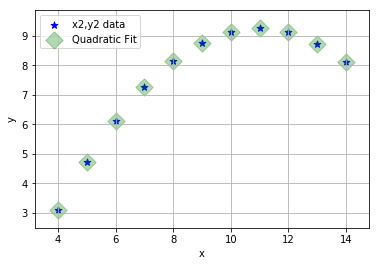

In [178]:
# Scatter Plots to visualise if quadratic fit is aligned with y2 data points.
plt.scatter(x2,y2,color = "blue", label='x2,y2 data',marker='*',s=50 )
plt.scatter(x2,yval,color = "green", label='Quadratic Fit',marker='D',s=150, alpha="0.3")
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.show()

## Correlation Coefficient

The correlation coefficients for the four x,y data sets were found to be the same. 

Reviewing the plot for x3 v y3, there is one outlier from an otherwise apparently linear relationship.
The outlier will be removed to determine its impact on correlation coefficient. The data points for the outlier are at index 2.

In [ ]:
# New arrays created to remove values at index 2 of original data set.
x3_del = np.delete(x3,2)
y3_del = np.delete(y3,2)

corr_x3y3_del = np.corrcoef(x3_del,y3_del)[0][1]
print("The correlation coefficient between x3 and y3, with data at index 2 deleted, is %6.3f" % corr_x3y3_del)

Therefore, for the x3y3 data set, with the outlier at index 2 deleted, there is a linearly increasing perfect correlation between x3 and y3.  

## References
1. Anscombe quartet dataset source, http://www3.wabash.edu/econometrics/econometricsbook/Chapters/Ch05InterpretingRegression/ExcelFiles/Anscombe.xls

2. Pandas documentation for Styles, http://pandas.pydata.org/pandas-docs/stable/style.html

3. Covariance Wikipedia, https://en.wikipedia.org/wiki/Covariance
